## Cross-Species Neural Correlation

# Overview

In this project, we explored the relationship between gene expression patterns and the electrophysiological properties of neurons across different brain structures in humans and mice. By analyzing data from the Allen Brain Atlas, we aimed to identify conserved neural properties and patterns that could provide insights into the similarities and differences in brain function between these species. Our approach involved data cleaning, visualization, and various machine learning techniques to analyze and interpret the data.

<a id='research_question'></a>
# Research Question

How do the gene expression patterns and electrophysiological properties of neurons correlate across the different brain structures of humans and mice?

<a id='background'></a>

## Background & Prior Work

  Studying the connection between gene expression patterns and the electrophysiological properties of neurons is crucial for understanding how brain functions emerge at the cellular level. Different brain regions involved in cognition, sensory processing, and motor control exhibit specific characteristics influenced by their gene expression profiles and electrophysiological properties. Our group is particularly interested in the correlations between human brain function and neural activity in mice, as these similarities can validate whether discoveries in mouse physiology apply to humans.
    <p>Gouwens et al. (2020) correlated the transcriptomic and electrophysiological diversity in mouse visual cortical neurons, identifying unique neuronal types with distinct molecular and functional profiles. This study expands our knowledge of the molecular foundations of neuronal diversity, offering insights that could lead to a deeper understanding of how complex neural networks work.
    <p>Clancy et al. (2009) contributes to our understanding of cross-species correlations with a focus on the cortical GABAergic and subplate neural populations in mice, rats, and macaque species. The authors observed that these particular neurons have many different shapes and structures, which sets them apart from the more common type of neurons called pyramidal neurons, which is closely related to some of the findings from Gouwens et al. (2020).
    <p>Földy et al. (2016) demonstrated how specific gene expression patterns correspond to electrophysiological behaviors in human cortical neurons, assisting in our understanding of how the human brain functions. These studies, supported by resources like the Allen Brain Atlas, have created an in-depth view of how genetic and electrophysiological properties can be visualized with large-scale data. The Allen Brain Atlas has made it possible to make inferences about many kinds of data observed by the firing of action potentials. This gives us the chance to observe the behavior of neurons, helping doctors catch and diagnose neurological disorders before they worsen.
    <p>Recent research by Kim et al. (2023) further supports the relevance of using mice as models for human brain studies by showing that inhibitory circuit motifs are strikingly similar between humans and mice. Their study highlights conserved synaptic dynamics involving excitatory and inhibitory neurons, reinforcing the notion that findings in mouse models can be relevant to understanding human neurophysiology. This cross-species comparison adds a significant layer of validation to the extensive use of mouse models in neuroscience research, emphasizing the evolutionary conservation of key neural circuits.


References (include links):
- 1) https://pubmed.ncbi.nlm.nih.gov/33186530/
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2779099/
- 3) https://pubmed.ncbi.nlm.nih.gov/27531958/
- 4) https://portal.brain-map.org/?utm_source=google&utm_medium=cpc&utm_campaign=brand_brainmaporg&gad_source=1&gclid=Cj0KCQjw_-GxBhC1ARIsADGgDjtsd3F3KRm0a_lF7V1HnmiDBTRpFChm8CFby2PwiNrXDjFz0NzB1fYaAlWDEALw_wcB
- 5) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10332809/
        

# Hypothesis


We hypothesize that the characteristics of neurons will not form distinct clusters between humans and mice, but rather will show significant correlation, reflecting conserved neural properties across these species.

# Dataset(s)


- Dataset Name: Cell Features: Allen Brain Atlas - Cell Types
- Link to the dataset: https://celltypes.brain-map.org/data
- Number of observations: 2333 rows and 53 columns

We plan to combine the brain cell database's datasets by aligning the gene expression profiles and electrophysiological properties of neurons from both human and mouse brain structures. This will involve standardizing the data formats and using statistical methods to integrate and compare the features across species to identify conserved patterns and correlations.


# Data Wrangling

In [1]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data  = pd.read_csv('cell_types_specimen_details.csv').set_index('specimen__id')
print(data.shape)
data.columns

(2333, 53)


Index(['line_name', 'specimen__name', 'specimen__hemisphere', 'structure__id',
       'structure__name', 'structure__acronym', 'structure_parent__id',
       'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_thumb_path', 'ep

# Data Cleaning

<p>To clean our dataset, we first identified and selected relevant columns essential for our analysis, focusing on brain structures, species, and key electrophysiological properties such as average firing rate and resting membrane potential. We filtered the dataset to include only these columns and then removed any rows with missing values to ensure a complete and accurate dataset for further analysis.


In [3]:
## YOUR CODE HERE
relevant_cols = [ 'structure__name', 'donor__species', 'ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']

In [4]:
data_filtered = data[relevant_cols]
data_clean = data_filtered.dropna()
print(data_clean.shape)
data_clean.head()

(2176, 5)


,structure__name,donor__species,ef__avg_firing_rate,ef__vrest,ef__upstroke_downstroke_ratio_long_square
specimen__id,,,,,
525011903,"""frontal lobe""",Homo Sapiens,13.572511,-70.561035,2.895461
469801138,"""Primary visual area, layer 4""",Mus musculus,79.952029,-72.042976,1.162618
528642047,"""middle temporal gyrus""",Homo Sapiens,77.445126,-69.209610,1.891881
605889373,"""Primary visual area, layer 2/3""",Mus musculus,12.666099,-72.712036,3.379321
537256313,"""middle temporal gyrus""",Homo Sapiens,12.919897,-72.628105,3.121182


# Data Visualization

In [5]:
human_df = data_clean[data_clean['donor__species'] == 'Homo Sapiens']
mouse_df = data_clean[data_clean['donor__species'] == 'Mus musculus']
combined_df = pd.concat([human_df, mouse_df])

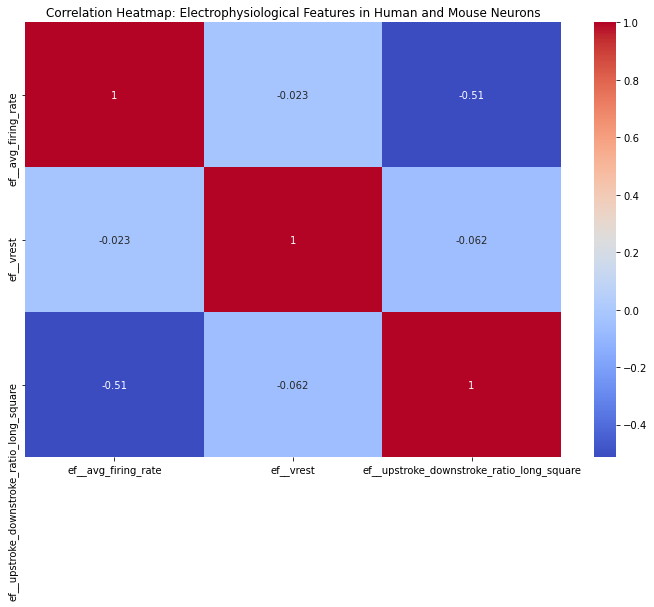

In [6]:
# Select electrophysiological features
electrophysiological_features = ['ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']

# Calculate correlation matrix
combined_df_features = combined_df[electrophysiological_features]
correlation_matrix = combined_df[electrophysiological_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Electrophysiological Features in Human and Mouse Neurons")
plt.show()

The correlation heatmap shows that the electrophysiological features have varying degrees of correlation, with average firing rate and upstroke/downstroke ratio having a moderate negative correlation (-0.51). Most other feature pairs have low or negligible correlations, indicating that these features are relatively independent of each other in both human and mouse neurons.

## Scaling the data

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[electrophysiological_features])
scaled_df = combined_df.copy()
scaled_df[electrophysiological_features] = scaled_data

## PCA

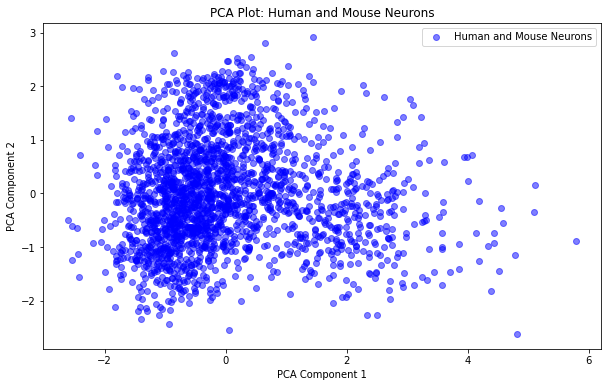

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.5, label='Human and Mouse Neurons')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot: Human and Mouse Neurons')
plt.legend()
plt.show()

The PCA plot shows significant overlap between human and mouse neurons, indicating that the main sources of variance in their electrophysiological features are shared.

# TSNE

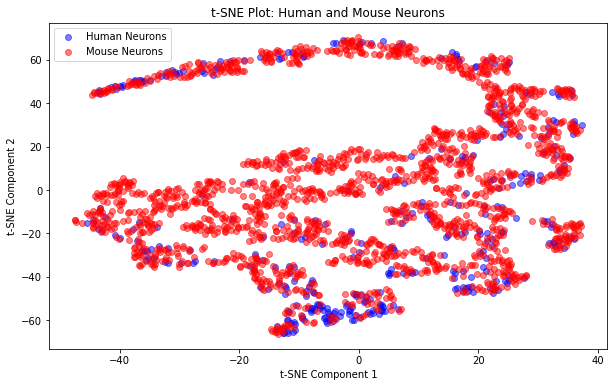

In [9]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(combined_df[electrophysiological_features])

# Create labels for human and mouse data
labels = combined_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')

# Plot t-SNE results
plt.figure(figsize=(10, 6))
for label, color in zip(['Human', 'Mouse'], ['blue', 'red']):
    indices = (labels == label)
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], c=color, alpha=0.5, label=f'{label} Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot: Human and Mouse Neurons')
plt.legend()
plt.show()

The t-SNE plot shows that human (blue) and mouse (red) neurons have overlapping but somewhat distinct gene expression profiles, with clusters indicating species-specific patterns. This suggests both shared and unique gene expression characteristics between human and mouse neurons.

# TSNE With Scaled Data

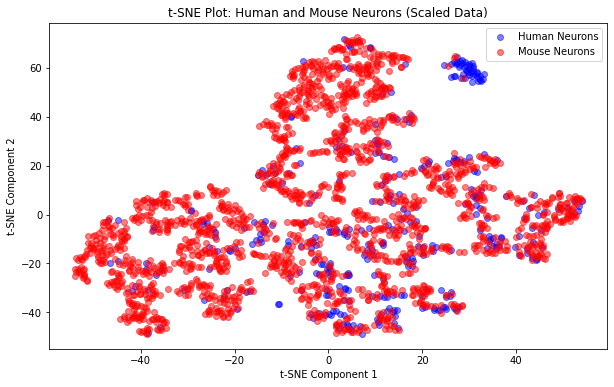

In [10]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df[electrophysiological_features])

# Create labels for human and mouse data
labels = scaled_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')

# Plot t-SNE results
plt.figure(figsize=(10, 6))
for label, color in zip(['Human', 'Mouse'], ['blue', 'red']):
    indices = (labels == label)
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], c=color, alpha=0.5, label=f'{label} Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot: Human and Mouse Neurons (Scaled Data)')
plt.legend()
plt.show()

The t-SNE plot with scaled data demonstrates overlapping distributions of human (blue) and mouse (red) neurons, similar to the previous plot, but with more distinct clustering. This enhanced separation suggests that scaling the data improves the visualization of species-specific gene expression patterns, highlighting clearer differences between human and mouse neurons.

# Box and Whisker Plots

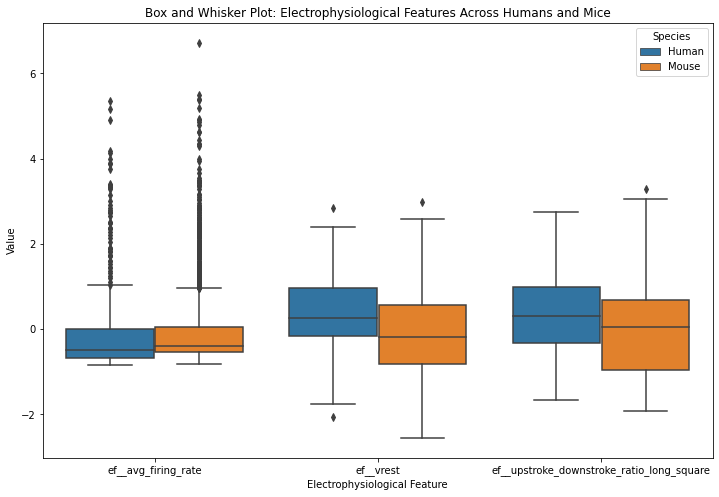

In [11]:
scaled_df['Species'] = scaled_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')


melted_df = scaled_df.melt(id_vars=['Species'], value_vars=electrophysiological_features, var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 8))
sns.boxplot(x='Feature', y='Value', hue='Species', data=melted_df)
plt.title('Box and Whisker Plot: Electrophysiological Features Across Humans and Mice')
plt.xlabel('Electrophysiological Feature')
plt.ylabel('Value')
plt.legend(title='Species', loc='upper right')
plt.show()

The overlapping interquartile ranges for all features suggest that there are similarities between the species, but the slight differences in medians and spread indicate that there are also distinct electrophysiological characteristics. These differences may contribute to the complex relationship between gene expression and electrophysiological properties observed in previous analyses.

# Data Analysis & Results

# Regression Plot

<Figure size 720x432 with 0 Axes>

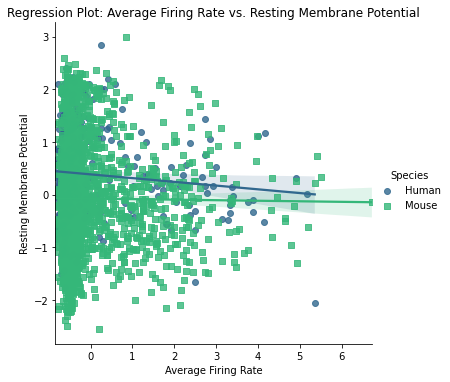

In [12]:
# Regression Plot: Visualize the relationship between 'ef__avg_firing_rate' and 'ef__vrest'
plt.figure(figsize=(10, 6))
sns.lmplot(x='ef__avg_firing_rate', y='ef__vrest', hue='Species', data=scaled_df, markers=['o', 's'], palette='viridis')
plt.title('Regression Plot: Average Firing Rate vs. Resting Membrane Potential')
plt.xlabel('Average Firing Rate')
plt.ylabel('Resting Membrane Potential')
plt.show()

/tmp/ipykernel_579/25684782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Species'] = data_clean['donor__species'].apply(lambda x: 1 if x == 'Homo Sapiens' else 0)


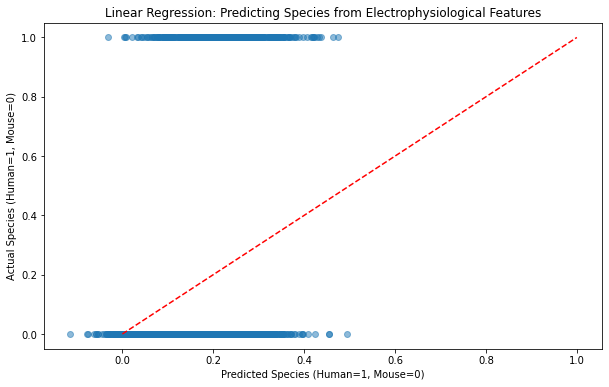

In [13]:
data_clean['Species'] = data_clean['donor__species'].apply(lambda x: 1 if x == 'Homo Sapiens' else 0)

# Select electrophysiological features and the species column
features = ['ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']
X = data_clean[features]
y = data_clean['Species']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_scaled, y)

# Predictions
y_pred = regressor.predict(X_scaled)

# Plot linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Predicted Species (Human=1, Mouse=0)')
plt.ylabel('Actual Species (Human=1, Mouse=0)')
plt.title('Linear Regression: Predicting Species from Electrophysiological Features')
plt.show()

The linear regression model failed to predict species based on electrophysiological features, as indicated by the predicted values clustering around 0 and 1, with no clear separation. This suggests that the relationship between electrophysiological features and species is likely nonlinear or more complex, requiring more advanced models for accurate classification.

# Clustering 

## K-Means

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4e22c468b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4e19299c10>
Traceback 

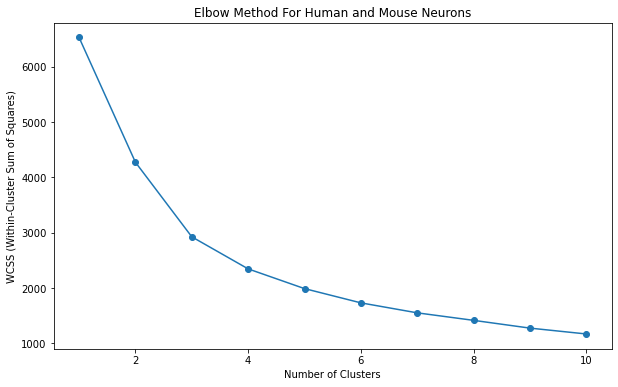

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df[features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Human and Mouse Neurons')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

The elbow method plot indicates that the optimal number of clusters for human and mouse neurons is around three or four, where the Within-Cluster Sum of Squares (WCSS) begins to flatten.

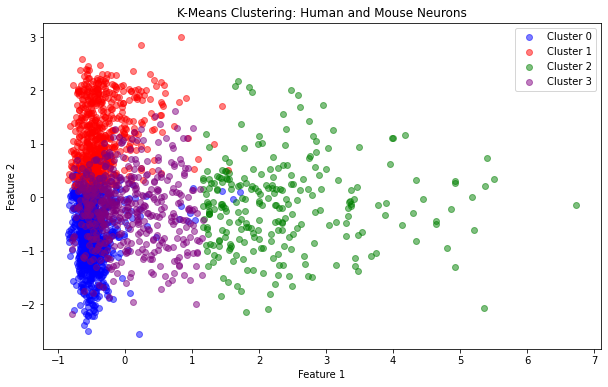

In [15]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df[features])
scaled_df['Cluster'] = kmeans_labels

# Plot the K-Means clustering results
plt.figure(figsize=(10, 6))
for label, color in zip(range(optimal_clusters), ['blue', 'red', 'green', 'purple']):
    indices = (kmeans_labels == label)
    plt.scatter(scaled_data[indices, 0], scaled_data[indices, 1], c=color, alpha=0.5, label=f'Cluster {label}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering: Human and Mouse Neurons')
plt.legend()
plt.show()

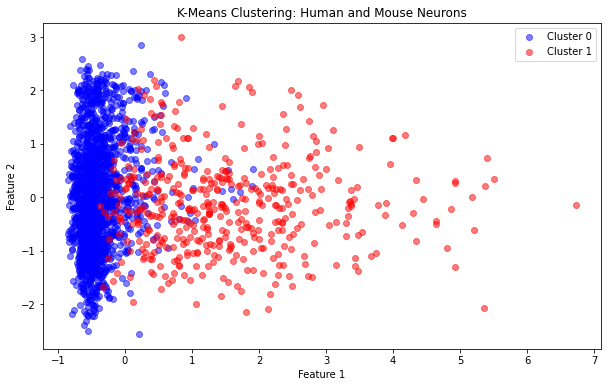

In [16]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df[features])
scaled_df['Cluster'] = kmeans_labels

# Plot the K-Means clustering results
plt.figure(figsize=(10, 6))
for label, color in zip(range(optimal_clusters), ['blue', 'red', 'green', 'purple']):
    indices = (kmeans_labels == label)
    plt.scatter(scaled_data[indices, 0], scaled_data[indices, 1], c=color, alpha=0.5, label=f'Cluster {label}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering: Human and Mouse Neurons')
plt.legend()
plt.show()

### Graph with Truth Labels

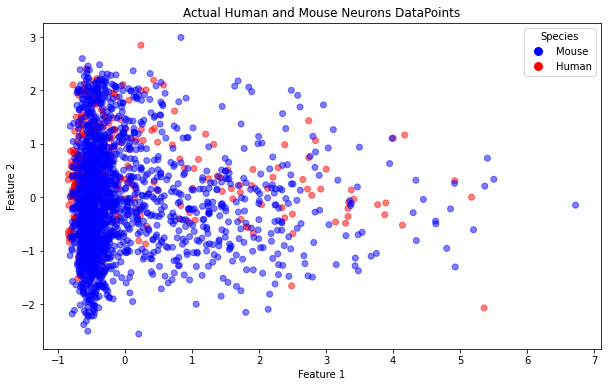

In [17]:
species_colors = {'Homo Sapiens': 'red', 'Mus musculus': 'blue'}
colors = scaled_df['donor__species'].map(species_colors)


handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Mouse'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Human')]


plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=colors, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=handles, title='Species')
plt.title('Actual Human and Mouse Neurons DataPoints')
plt.show()

When we use 2 clusters we notice that the K-Means clustering shows a clear separation between the neurons, highlighting distinct gene expression patterns between the species. But when we get a graph with the labelled data we have we notice that the mouse and human neurons are pretty indistinguishible in the graph and don't exist in 2 clear clusters, what K-Means suggests.

## DBScan

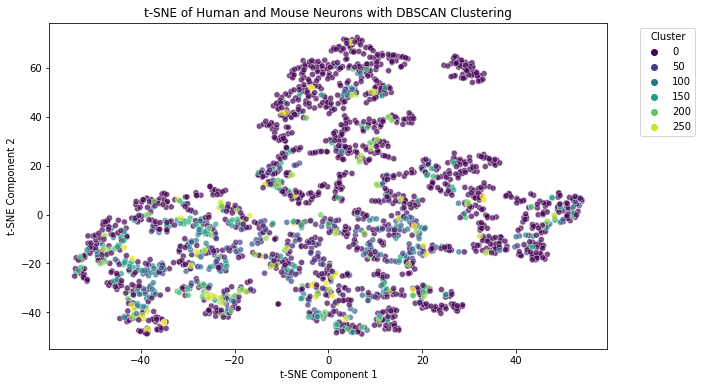

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(combined_df[features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.7)
plt.title('t-SNE of Human and Mouse Neurons with DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The DBSCAN clustering analysis, visualized with t-SNE, reveals numerous small clusters of neurons, indicating highly heterogeneous gene expression patterns. This suggests that the neurons exhibit a wide range of gene expression profiles, potentially correlating with different electrophysiological properties.

## DBSCAN With Scaled Data

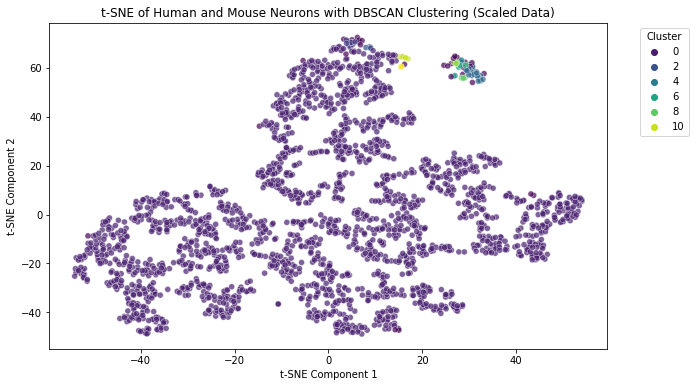

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_df[features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.7)
plt.title('t-SNE of Human and Mouse Neurons with DBSCAN Clustering (Scaled Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This shows fewer and more distinct clusters, indicating improved separation of neuron groups based on gene expression patterns. This suggests that scaling enhances the quality of clustering.

# Conclusion & Discussion

<p>We analyzed merged datasets on gene expression and electrophysiological properties of neurons from human and mouse brains to identify conserved and distinct neural characteristics. Through data cleaning, visualization, and machine learning, we found significant insights into electrophysiological properties across species. PCA and t-SNE indicated conserved neural mechanisms, while clustering analysis revealed species-specific patterns, emphasizing the importance of appropriate scaling and visualization. These findings agree with our hypothesis that neuronal characteristics will not form distinct clusters between humans and mice but will show significant correlation, reflecting conserved neural properties. Trends in specific electrophysiological features, such as the resting voltage and oscillations, were similar between human and mouse neurons, supporting the use of mouse models in studying human brain function.
<p>Despite these insights, our analysis faced limitations, including data constraints and the linear regression model's inability to predict species accurately, suggesting the need for more complex models. The use of unsupervised Machine Learning techniques, when compared to the labelled data, we noticed yielded no significant results. Larger and more diverse datasets, additional electrophysiological features, and temporal data would provide more robust insights. 
<p>Future research would explore nonlinear models, incorporate gene expression profiles, and conduct longitudinal and spatial transcriptomic studies. Using gene functional annotations from databases like Gene Ontology or KEGG could enhance understanding. Our study confirms significant conserved neural properties across species while highlighting unique aspects that warrant further investigation, enhancing our understanding of brain function and the relevance of mouse models in neuroscience research.